In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import os
from matplotlib.ticker import LogLocator

# sns.set(style="whitegrid")
sns.set_context("notebook", font_scale=1.2)

colors = sns.color_palette("tab10")

from scipy.optimize import curve_fit

def model_func(x, a, b, c):
    return a * np.exp(-b * x ** c) 


p = [51.0282, 0.755229, 0.336993]

# Larger Systems

Parameters Formaldehyde: [51.0282, 0.755229, 0.336993]


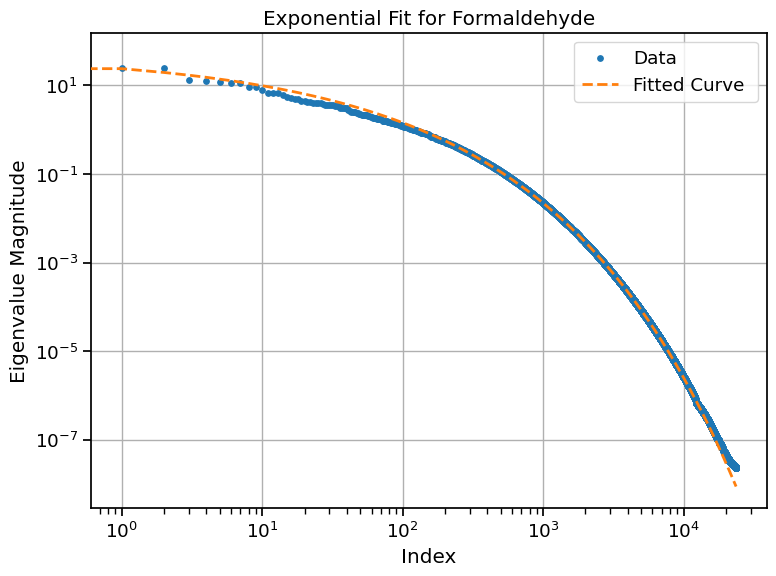

In [2]:
folder = "/home/fmereto/MA_best/test/"

EV_H2 = np.sqrt(abs(np.array(np.loadtxt(folder + "H2_eigenvalues.txt"))[:-400]))
EV_formal = np.sqrt(abs(np.array(np.loadtxt(folder + "formaldehyde_eigenvalues.txt"))[:-4000]))
EV_uracil = np.sqrt(abs(np.array(np.loadtxt(folder + "uracil_eigenvalues.txt"))[:-500]))
x_H2 = np.arange(len(EV_H2))
x_formal = np.arange(len(EV_formal))
x_uracil = np.arange(len(EV_uracil))

molecules = ['H2', 'formal', 'uracil']   

print("Parameters Formaldehyde:", p)

plt.figure(figsize=(8, 6))
plt.scatter(x_formal, EV_formal, label='Data', color=colors[0], zorder=10, s=15)
plt.plot(x_formal, model_func(x_formal, *p), color=colors[1], linestyle='--', label='Fitted Curve ', zorder=20, linewidth=2)
plt.yscale('log')
plt.xscale('log')
plt.xlabel('Index')
plt.ylabel('Eigenvalue Magnitude')
plt.title('Exponential Fit for Formaldehyde')
plt.legend()
plt.tight_layout()
plt.grid(zorder=1)
# sns.despine()
plt.savefig("exponential_fit_formaldehyde.pdf") 
plt.show()

# Smaller Systems


In [3]:
EV_He = np.abs(np.loadtxt("eigenvalues_He.txt")[:2430])
EV_hBN = np.abs(np.loadtxt("eigenvalues_hBN.txt")[:-1000])
EV_Si = np.abs(np.loadtxt("eigenvalues_Si.txt")[:-1000])

He: a = 5.452416958571907, b = 0.0025528200446160937, c = 2.6540463058285146


/tmp/ipykernel_2330095/2713056597.py:18: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r--" (-> color='r'). The keyword argument will take precedence.
  plt.plot(x_data, y_fit, 'r--', label='Fitted curve', color=colors[1], linewidth=2)


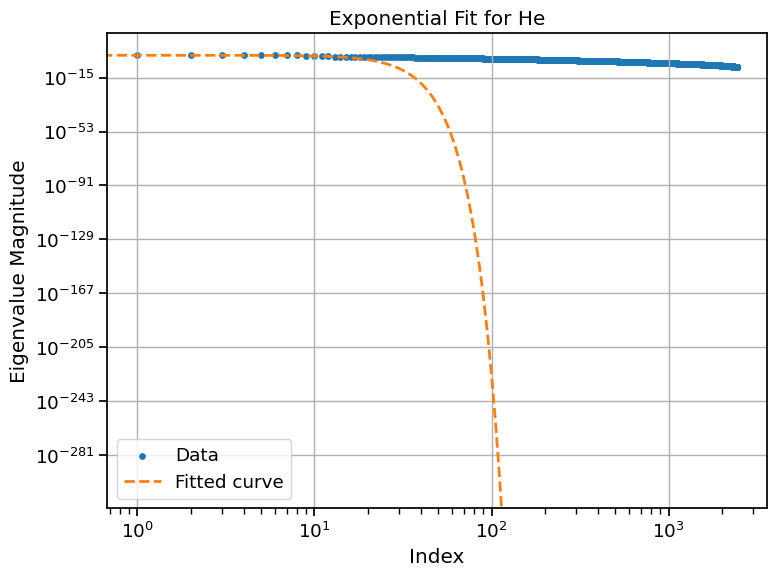

hBN: a = 10.47604743335439, b = 0.05787025455952936, c = 0.596024901365976


/tmp/ipykernel_2330095/2713056597.py:18: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r--" (-> color='r'). The keyword argument will take precedence.
  plt.plot(x_data, y_fit, 'r--', label='Fitted curve', color=colors[1], linewidth=2)


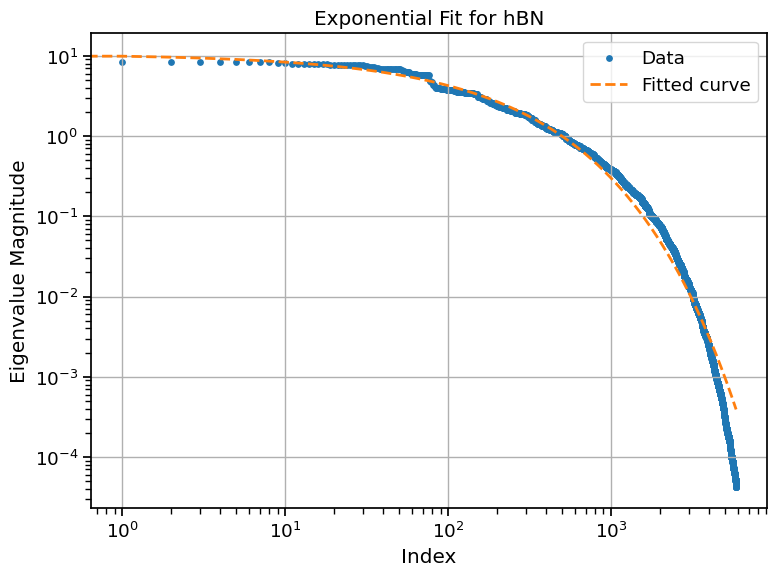

Si: a = 7.234617303942844, b = 0.06319500971971206, c = 0.5056701172521776


/tmp/ipykernel_2330095/2713056597.py:18: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r--" (-> color='r'). The keyword argument will take precedence.
  plt.plot(x_data, y_fit, 'r--', label='Fitted curve', color=colors[1], linewidth=2)


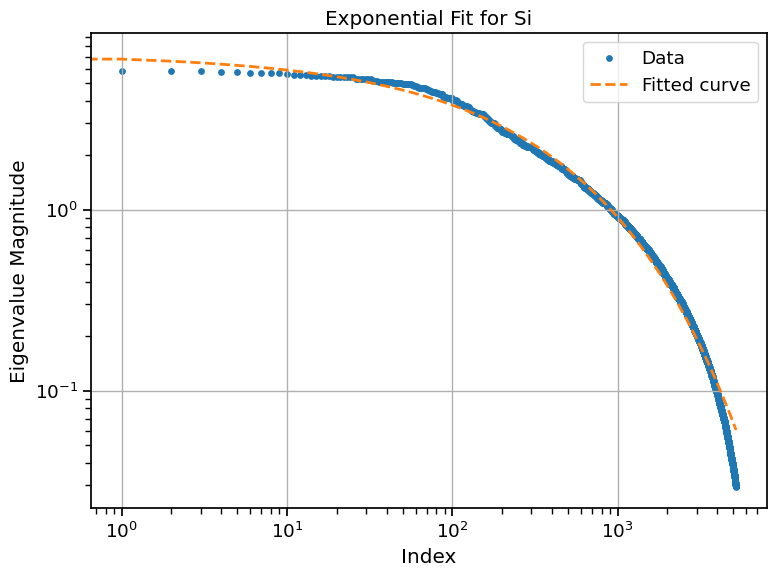

In [4]:
params_He, _ = curve_fit(model_func, np.arange(len(EV_He)), EV_He, p0=p)

params_hBN, _ = curve_fit(model_func, np.arange(len(EV_hBN)), EV_hBN, p0=p)

params_Si, _ = curve_fit(model_func, np.arange(len(EV_Si)), EV_Si, p0=p)

molecules_2 = ['He', 'hBN', 'Si'] #
params = [params_He, params_hBN, params_Si]
all_params = dict(zip(molecules_2, params))

for mol in molecules_2:
    a, b, c = all_params[mol]
    print(f"{mol}: a = {a}, b = {b}, c = {c}")
    x_data = np.arange(len(eval(f"EV_{mol}")))
    y_fit = model_func(x_data, a, b, c) 
    plt.figure(figsize=(8, 6))
    plt.scatter(x_data, eval(f"EV_{mol}"), label='Data', color=colors[0], s=15)
    plt.plot(x_data, y_fit, 'r--', label='Fitted curve', color=colors[1], linewidth=2)
    plt.yscale('log')
    plt.xscale('log')
    plt.xlabel('Index')
    plt.ylabel('Eigenvalue Magnitude')
    plt.title(f'Exponential Fit for {mol}')
    plt.legend()
    plt.tight_layout()
    plt.grid(zorder=1)
    # sns.despine()
    plt.savefig(f'exponential_fit_{mol}.pdf')
    plt.show()